In [2]:
%matplotlib notebook

In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# Make a reference to the mousedata.csv files
csv_path_drug = "data/mouse_drug_data.csv"
csv_path_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_drug_df = pd.read_csv(csv_path_drug, encoding="utf-8")
mouse_drug_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [4]:
clinical_trial_df = pd.read_csv(csv_path_trial, encoding="utf-8")
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
# Merge the two DataFrames together based on the Dates they share
mouse_trial_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")


# Display the data table for preview
mouse_trial_df.info()
mouse_trial_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_trial = mouse_trial_df.groupby (["Drug","Timepoint"])
#timepoint = group_trial["Timepoint"]
avg_tumor_vol = group_trial["Tumor Volume (mm3)"].mean()
ste_tumor_vol = group_trial["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
group_trial_df = pd.DataFrame({"Avg Tumor Volume": avg_tumor_vol,
                              "Tumor Volume Std Error": ste_tumor_vol})
# Preview DataFrame

group_trial_df.info()
group_trial_df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 2 columns):
Avg Tumor Volume          100 non-null float64
Tumor Volume Std Error    100 non-null float64
dtypes: float64(2)
memory usage: 2.0+ KB


Avg Tumor Volume  Tumor Volume Std Error
Drug      Timepoint                                          
Capomulin 0                 45.000000                0.000000
          5                 44.266086                0.448593
          10                43.084291                0.702684
          15                42.064317                0.838617
          20                40.716325                0.909731

## Tumor Response to Treatment

In [7]:
# Minor Data Munging to Re-Format the Data Frames
munged_data = group_trial_df.reset_index()
# Preview that Reformatting worked
munged_data.set_index("Drug")
munged_data.info()
munged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Drug                      100 non-null object
Timepoint                 100 non-null int64
Avg Tumor Volume          100 non-null float64
Tumor Volume Std Error    100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


,Drug,Timepoint,Avg Tumor Volume,Tumor Volume Std Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


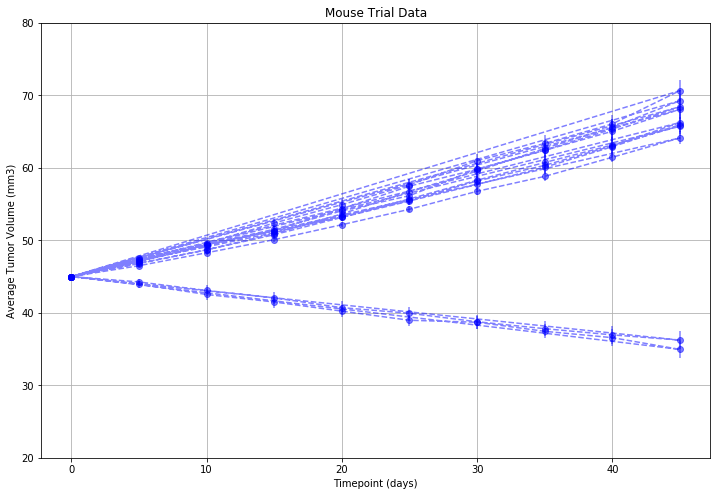

In [8]:
# Plot mouse tumor volules with error bars
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
x = munged_data["Timepoint"]
y = munged_data["Avg Tumor Volume"]
stderror = munged_data["Tumor Volume Std Error"]

ax.errorbar(x, y, stderror, fmt="--o", color="b",alpha=0.5, label="Std Error of Tumor Volumes")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(20,80)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Average Tumor Volume (mm3)")

#plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

In [9]:
df = pd.DataFrame(munged_data)
pivot_data = df.pivot(index='Timepoint', columns='Drug', values=['Avg Tumor Volume'])#,'Tumor Volume Std Error'])
#pivot_data.info()
#pivot_data.head(10)
pivot_data_df = pivot_data.reset_index()
#pivot_data_df.info()
pivot_data_df.head(10)


Timepoint Avg Tumor Volume                                              \
Drug                  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
0            0        45.000000  45.000000  45.000000  45.000000  45.000000   
1            5        44.266086  46.503051  47.062001  47.389175  46.796098   
2           10        43.084291  48.285125  49.403909  49.582269  48.694210   
3           15        42.064317  50.094055  51.296397  52.399974  50.933018   
4           20        40.716325  52.157049  53.197691  54.920935  53.644087   
5           25        39.939528  54.287674  55.715252  57.678982  56.731968   
6           30        38.769339  56.769517  58.299397  60.994507  59.559509   
7           35        37.816839  58.827548  60.742461  63.371686  62.685087   
8           40        36.958001  61.467895  63.162824  66.068580  65.600754   
9           45        36.236114  64.132421  65.755562  70.662958  69.265506   

                                                             
Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334  
5     57.482574  55.504138  38.974300  56.166123  55.432935  
6     59.809063  58.196374  38.703137  59.826738  57.713531  
7     62.420615  60.350199  37.451996  62.440699  60.089372  
8     65.052675  63.045537  36.574081  65.356386  62.916692  
9     68.084082  66.258529  34.955595  68.438310  65.960888

In [10]:
df = munged_data
df_cap = df.loc[df["Drug"] == "Capomulin", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_cef = df.loc[df["Drug"] == "Ceftamin", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_inf = df.loc[df["Drug"] == "Infubinol", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_ket = df.loc[df["Drug"] == "Ketapril", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_naf = df.loc[df["Drug"] == "Naftisol", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_pla = df.loc[df["Drug"] == "Placebo", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_pro = df.loc[df["Drug"] == "Propiva", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_ram = df.loc[df["Drug"] == "Ramicane", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_ste = df.loc[df["Drug"] == "Stelasyn", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
df_zon = df.loc[df["Drug"] == "Zoniferol", ["Timepoint", "Avg Tumor Volume", "Tumor Volume Std Error"]]
       
#df_cap

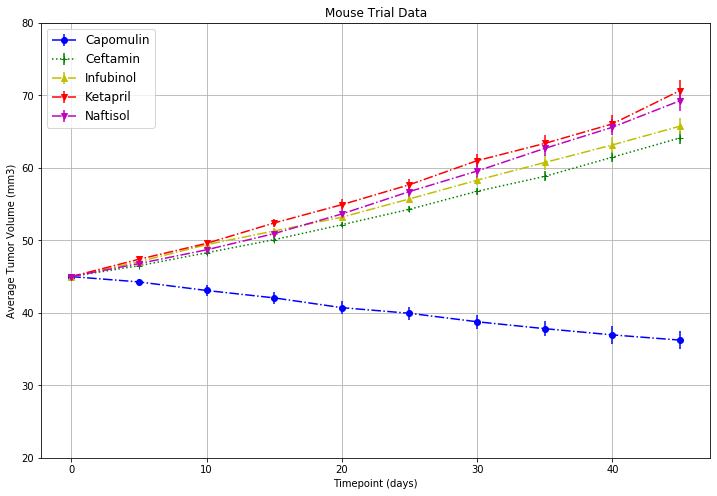

In [11]:
# Plot mouse tumor volumes with error bars
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

x = df_cap["Timepoint"]
y = df_cap["Avg Tumor Volume"]
stderror = df_cap["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.o", color="b",label="Capomulin")

x = df_cef["Timepoint"]
y = df_cef["Avg Tumor Volume"]
stderror = df_cef["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt=":+", color="g",label="Ceftamin")

x = df_inf["Timepoint"]
y = df_inf["Avg Tumor Volume"]
stderror = df_inf["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.^", color="y",label="Infubinol")

x = df_ket["Timepoint"]
y = df_ket["Avg Tumor Volume"]
stderror = df_ket["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.v", color="r",label="Ketapril")

x = df_naf["Timepoint"]
y = df_naf["Avg Tumor Volume"]
stderror = df_naf["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.v", color="m",label="Naftisol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(20,80)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Average Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="large", fancybox=True)

# Save the figure
plt.savefig("Mouse_avg_tumor_vol1.png")

plt.show()

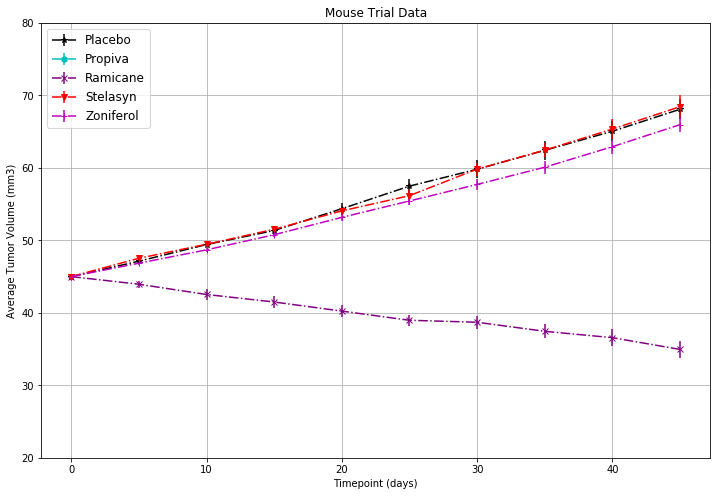

In [12]:
# Plot mouse tumor volumes with error bars
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

x = df_pla["Timepoint"]
y = df_pla["Avg Tumor Volume"]
stderror = df_pla["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.*", color="k", label="Placebo")

x = df_pro["Timepoint"]
y = df_pro["Avg Tumor Volume"]
stderror = df_pro["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.h", color="c", label="Propiva")

x = df_ram["Timepoint"]
y = df_ram["Avg Tumor Volume"]
stderror = df_ram["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.x", color="purple", label="Ramicane")

x = df_ste["Timepoint"]
y = df_ste["Avg Tumor Volume"]
stderror = df_ste["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.v", color="red", label="Stelasyn")

x = df_zon["Timepoint"]
y = df_zon["Avg Tumor Volume"]
stderror = df_zon["Tumor Volume Std Error"]
ax.errorbar(x, y, stderror, fmt="-.+", color="m", label="Zoniferol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(20,80)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Average Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="large", fancybox=True)

# Save the figure
plt.savefig("Mouse_avg_tumor_vol2.png")

plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
metagroup_trial = mouse_trial_df.groupby (["Drug","Timepoint"])

avg_meta_sites = metagroup_trial["Metastatic Sites"].mean()
ste_meta_sites = metagroup_trial["Metastatic Sites"].sem()

# Convert to DataFrame
metagroup_trial_df = pd.DataFrame({"Avg Metastatic Site": avg_meta_sites,
                              "Metastatic Sites Std Error": ste_meta_sites})
# Preview DataFrame

#metagroup_trial_df.shape()
metagroup_trial_df.info()
metagroup_trial_df.head()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 2 columns):
Avg Metastatic Site           100 non-null float64
Metastatic Sites Std Error    100 non-null float64
dtypes: float64(2)
memory usage: 2.0+ KB


Avg Metastatic Site  Metastatic Sites Std Error
Drug      Timepoint                                                 
Capomulin 0                     0.000000                    0.000000
          5                     0.160000                    0.074833
          10                    0.320000                    0.125433
          15                    0.375000                    0.132048
          20                    0.652174                    0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
# Minor Data Munging to Re-Format the Data Frames
munged_metasite_data = metagroup_trial_df.reset_index()
# Preview that Reformatting worked
munged_metasite_data.info()
munged_metasite_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Drug                          100 non-null object
Timepoint                     100 non-null int64
Avg Metastatic Site           100 non-null float64
Metastatic Sites Std Error    100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


,Drug,Timepoint,Avg Metastatic Site,Metastatic Sites Std Error
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [15]:
df = pd.DataFrame(munged_metasite_data)
pivot_metasitedata = df.pivot(index='Timepoint', columns='Drug', 
                              values='Avg Metastatic Site')
pivot_metasitedata_df = pivot_metasitedata.reset_index()
#pivot_metasitedata_df.info()
pivot_metasitedata_df.head(10)


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [16]:
df = munged_metasite_data
df_cap_met = df.loc[df["Drug"] == "Capomulin", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_cef_met = df.loc[df["Drug"] == "Ceftamin", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_inf_met = df.loc[df["Drug"] == "Infubinol", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_ket_met = df.loc[df["Drug"] == "Ketapril", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_naf_met = df.loc[df["Drug"] == "Naftisol", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_pla_met = df.loc[df["Drug"] == "Placebo", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_pro_met = df.loc[df["Drug"] == "Propiva", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_ram_met = df.loc[df["Drug"] == "Ramicane", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_ste_met = df.loc[df["Drug"] == "Stelasyn", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
df_zon_met = df.loc[df["Drug"] == "Zoniferol", ["Timepoint", "Avg Metastatic Site", "Metastatic Sites Std Error"]]
       
#df_cap

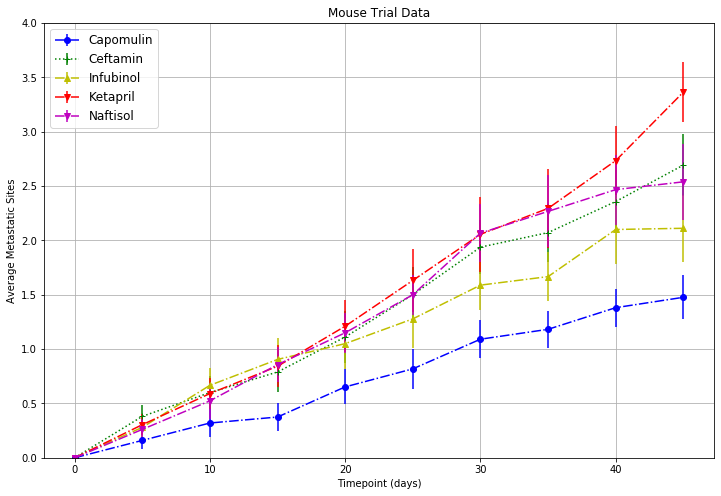

In [17]:
# Plot mouse tumor volumes with error bars
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

x = df_cap_met["Timepoint"]
y = df_cap_met["Avg Metastatic Site"]
stderror = df_cap_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.o", color="b",label="Capomulin")

x = df_cef_met["Timepoint"]
y = df_cef_met["Avg Metastatic Site"]
stderror = df_cef_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt=":+", color="g",label="Ceftamin")

x = df_inf_met["Timepoint"]
y = df_inf_met["Avg Metastatic Site"]
stderror = df_inf_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.^", color="y",label="Infubinol")

x = df_ket_met["Timepoint"]
y = df_ket_met["Avg Metastatic Site"]
stderror = df_ket_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.v", color="r",label="Ketapril")

x = df_naf_met["Timepoint"]
y = df_naf_met["Avg Metastatic Site"]
stderror = df_naf_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.v", color="m",label="Naftisol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(0,4)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Average Metastatic Sites")

plt.legend(loc="upper left", fontsize="large", fancybox=True)

# Save the figure
plt.savefig("Mouse_avg_metasite1.png")

plt.show()



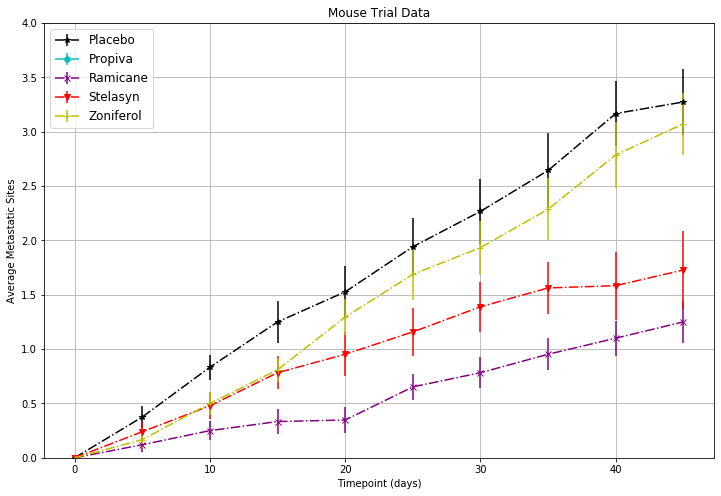

In [18]:
# Plot mouse tumor volumes with error bars
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

x = df_pla_met["Timepoint"]
y = df_pla_met["Avg Metastatic Site"]
stderror = df_pla_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.*", color="k", label="Placebo")

x = df_pro_met["Timepoint"]
y = df_pro_met["Avg Metastatic Site"]
stderror = df_pro_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.h", color="c", label="Propiva")

x = df_ram_met["Timepoint"]
y = df_ram_met["Avg Metastatic Site"]
stderror = df_ram_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.x", color="purple", label="Ramicane")

x = df_ste_met["Timepoint"]
y = df_ste_met["Avg Metastatic Site"]
stderror = df_ste_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.v", color="red", label="Stelasyn")

x = df_zon_met["Timepoint"]
y = df_zon_met["Avg Metastatic Site"]
stderror = df_zon_met["Metastatic Sites Std Error"]
ax.errorbar(x, y, stderror, fmt="-.+", color="y", label="Zoniferol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(0,4)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Average Metastatic Sites")

plt.legend(loc="upper left", fontsize="large", fancybox=True)

# Save the figure
plt.savefig("Mouse_avg_metasite2.png")

plt.show()

## Survival Rates

In [19]:
# Display the data table for preview
#mouse_trial_df.info()
#mouse_trial_df.head()

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount_trial = mouse_trial_df.groupby (["Drug","Timepoint"])

mouse_cnt = mousecount_trial["Mouse ID"].count()

#avg_tumor_vol
# Convert to DataFrame
mousecount_trial_df = pd.DataFrame({"Mouse Count": mouse_cnt})
# Preview DataFrame

mousecount_trial_df.info()
#mousecount_trial_df


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 1 columns):
Mouse Count    100 non-null int64
dtypes: int64(1)
memory usage: 1.3+ KB


In [20]:
# Minor Data Munging to Re-Format the Data Frames
munged_mousecount_data = mousecount_trial_df.reset_index()
# Preview that Reformatting worked
munged_mousecount_data.info()
#munged_mousecount_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug           100 non-null object
Timepoint      100 non-null int64
Mouse Count    100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [21]:
# Preview the Data Frame
df = pd.DataFrame(munged_mousecount_data)
pivot_mousecount = df.pivot(index='Timepoint', columns='Drug', 
                              values='Mouse Count')
pivot_mousecount_df = pivot_mousecount.reset_index()
pivot_mousecount_df.info()
pivot_mousecount_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Timepoint    10 non-null int64
Capomulin    10 non-null int64
Ceftamin     10 non-null int64
Infubinol    10 non-null int64
Ketapril     10 non-null int64
Naftisol     10 non-null int64
Placebo      10 non-null int64
Propriva     10 non-null int64
Ramicane     10 non-null int64
Stelasyn     10 non-null int64
Zoniferol    10 non-null int64
dtypes: int64(11)
memory usage: 960.0 bytes


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [36]:
timept_arr = pivot_mousecount_df['Timepoint'].to_numpy()
timept_arr

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [40]:
cap_array = pivot_mousecount_df['Capomulin'].to_numpy()
cap_array
cap_mouse_init = cap_array[0]
cap_mouse_surv = cap_array[0:]/mouse_init*100
cap_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100., 100., 100.,  96.,  92.,  88.,  88.,  88.,  84.,  84.])

In [50]:
cef_array = pivot_mousecount_df['Ceftamin'].to_numpy()
cef_array
cef_mouse_init = cef_array[0]
cef_mouse_surv = cef_array[0:]/mouse_init*100
cef_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100.,  84.,  80.,  76.,  72.,  72.,  64.,  56.,  56.,  52.])

In [51]:
inf_array = pivot_mousecount_df['Infubinol'].to_numpy()
inf_array
inf_mouse_init = inf_array[0]
inf_mouse_surv = inf_array[0:]/mouse_init*100
inf_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100., 100.,  84.,  84.,  80.,  72.,  68.,  48.,  40.,  36.])

In [52]:
ket_array = pivot_mousecount_df['Ketapril'].to_numpy()
ket_array
ket_mouse_init = ket_array[0]
ket_mouse_surv = ket_array[0:]/mouse_init*100
ket_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100.,  92.,  88.,  76.,  76.,  76.,  72.,  68.,  60.,  44.])

In [53]:
naf_array = pivot_mousecount_df['Naftisol'].to_numpy()
naf_array
naf_mouse_init = naf_array[0]
naf_mouse_surv = naf_array[0:]/mouse_init*100
naf_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100.,  92.,  84.,  84.,  80.,  72.,  60.,  60.,  60.,  52.])

In [54]:
pla_array = pivot_mousecount_df['Placebo'].to_numpy()
pla_array
pla_mouse_init = pla_array[0]
pla_mouse_surv = pla_array[0:]/mouse_init*100
pla_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100.,  96.,  96.,  80.,  76.,  68.,  60.,  56.,  48.,  44.])

In [55]:
pro_array = pivot_mousecount_df['Propriva'].to_numpy()
pro_array
pro_mouse_init = pro_array[0]
pro_mouse_surv = pro_array[0:]/mouse_init*100
pro_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([104., 100.,  92.,  68.,  68.,  56.,  52.,  40.,  36.,  28.])

In [56]:
ram_array = pivot_mousecount_df['Ramicane'].to_numpy()
ram_array
ram_mouse_init = ram_array[0]
ram_mouse_surv = ram_array[0:]/mouse_init*100
ram_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100., 100.,  96.,  96.,  92.,  92.,  92.,  84.,  80.,  80.])

In [57]:
ste_array = pivot_mousecount_df['Stelasyn'].to_numpy()
ste_array
ste_mouse_init = ste_array[0]
ste_mouse_surv = ste_array[0:]/mouse_init*100
ste_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([104., 100.,  92.,  92.,  84.,  76.,  72.,  64.,  48.,  44.])

In [58]:
zon_array = pivot_mousecount_df['Zoniferol'].to_numpy()
zon_array
zon_mouse_init = zon_array[0]
zon_mouse_surv = zon_array[0:]/mouse_init*100
zon_mouse_surv
#pct_change = array[1:]/array[:-1]*100
#pct_change

array([100.,  96.,  88.,  84.,  68.,  64.,  60.,  56.,  56.,  56.])

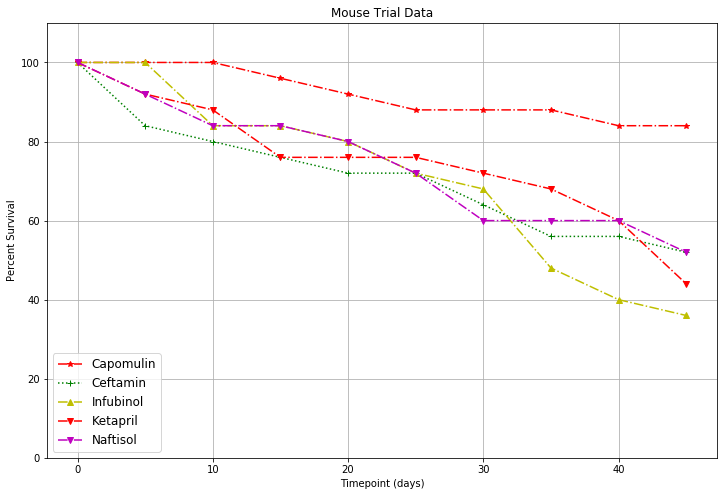

In [95]:
# Plot mouse survival rates
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

x = timept_arr
y = cap_mouse_surv
ax.errorbar(x, y, fmt="-.*", color="r", label="Capomulin")


y = cef_mouse_surv
ax.errorbar(x, y, fmt=":+", color="g",label="Ceftamin")

y = inf_mouse_surv
ax.errorbar(x, y, fmt="-.^", color="y",label="Infubinol")

y = ket_mouse_surv
ax.errorbar(x, y, fmt="-.v", color="r",label="Ketapril")

y = naf_mouse_surv
ax.errorbar(x, y, fmt="-.v", color="m",label="Naftisol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(0,110)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Percent Survival")

plt.legend(loc="best", fontsize="large", fancybox=True)

# Save the figure
plt.savefig("Mouse_survival1.png")

plt.show()

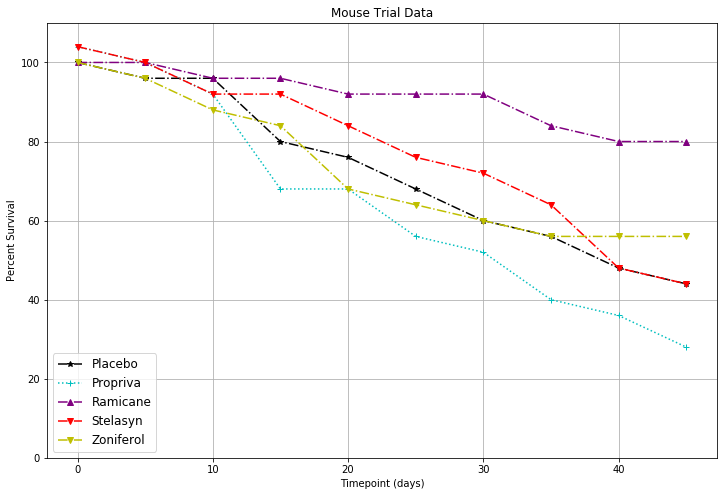

In [96]:
# Plot mouse survival rates
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

x = timept_arr
y = pla_mouse_surv
ax.errorbar(x, y, fmt="-.*", color="k", label="Placebo")


y = pro_mouse_surv
ax.errorbar(x, y, fmt=":+", color="c",label="Propriva")

y = ram_mouse_surv
ax.errorbar(x, y, fmt="-.^", color="purple",label="Ramicane")

y = ste_mouse_surv
ax.errorbar(x, y, fmt="-.v", color="red",label="Stelasyn")

y = zon_mouse_surv
ax.errorbar(x, y, fmt="-.v", color="y",label="Zoniferol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.xlabel("Timepoint (days)")
plt.grid(True)

ax.set_ylim(0,110)

ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Percent Survival")

plt.legend(loc="lower left", fontsize="large", fancybox=True)

# Save the figure
plt.savefig("Mouse_survival2.png")

plt.show()

## Summary Bar Graph

In [62]:
# Calculate the percent changes for each drug

# Display the data to confirm
pivot_data_df


Timepoint Avg Tumor Volume                                              \
Drug                  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
0            0        45.000000  45.000000  45.000000  45.000000  45.000000   
1            5        44.266086  46.503051  47.062001  47.389175  46.796098   
2           10        43.084291  48.285125  49.403909  49.582269  48.694210   
3           15        42.064317  50.094055  51.296397  52.399974  50.933018   
4           20        40.716325  52.157049  53.197691  54.920935  53.644087   
5           25        39.939528  54.287674  55.715252  57.678982  56.731968   
6           30        38.769339  56.769517  58.299397  60.994507  59.559509   
7           35        37.816839  58.827548  60.742461  63.371686  62.685087   
8           40        36.958001  61.467895  63.162824  66.068580  65.600754   
9           45        36.236114  64.132421  65.755562  70.662958  69.265506   

                                                             
Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334  
5     57.482574  55.504138  38.974300  56.166123  55.432935  
6     59.809063  58.196374  38.703137  59.826738  57.713531  
7     62.420615  60.350199  37.451996  62.440699  60.089372  
8     65.052675  63.045537  36.574081  65.356386  62.916692  
9     68.084082  66.258529  34.955595  68.438310  65.960888

In [99]:
tumor_vol_arr = pivot_data_df.to_numpy()
#tumor_vol_arr
cap_chg = (tumor_vol_arr[9,1] - 45)/45*100
cef_chg = (tumor_vol_arr[9,2] - 45)/45*100
inf_chg = (tumor_vol_arr[9,3] - 45)/45*100
ket_chg = (tumor_vol_arr[9,4] - 45)/45*100
naf_chg = (tumor_vol_arr[9,5] - 45)/45*100
pla_chg = (tumor_vol_arr[9,6] - 45)/45*100
pro_chg = (tumor_vol_arr[9,7] - 45)/45*100
ram_chg = (tumor_vol_arr[9,8] - 45)/45*100
ste_chg = (tumor_vol_arr[9,9] - 45)/45*100
zon_chg = (tumor_vol_arr[9,10] - 45)/45*100

tumor_vol = tuple([cap_chg, cef_chg, inf_chg, ket_chg, naf_chg, pla_chg, pro_chg, ram_chg, ste_chg, zon_chg])
drug_trt = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol','Placebo', 'Propriva', 'Ramicane',
                   'Stelasyn', 'Zoniferol']


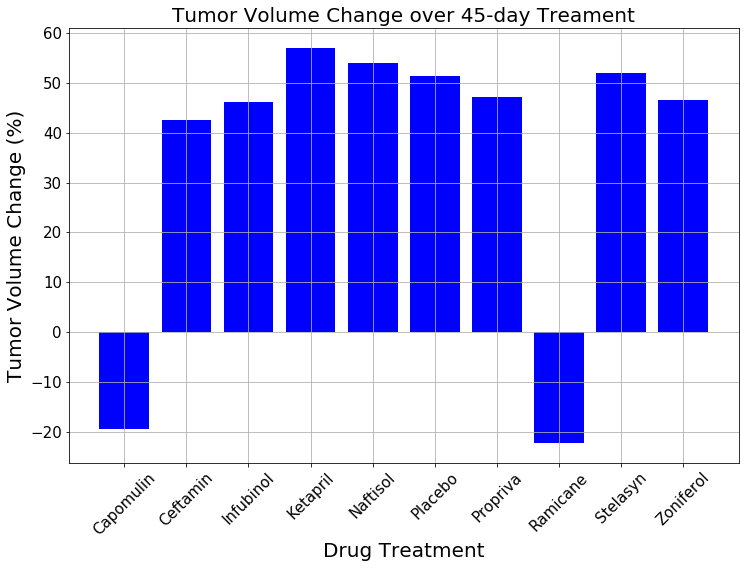

In [101]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .5*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=20)


fig = plt.figure(figsize=(12,8))        
plt.grid(True)

x_axis = np.arange(len(tumor_vol))
plt.bar(x_axis, tumor_vol, color="b", align="center")
plt.title('Tumor Volume Change over 45-day Treament',fontsize=20)
plt.ylabel("Tumor Volume Change (%)",fontsize=20)
plt.xlabel('Drug Treatment',fontsize=20)


plt.tick_params(labelsize=15)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_trt, rotation=45)

#values=specific_holidays[holiday]['Crashes']
#rects=[]
#values=[]
#for tumor_vol in tumor_vol:
#    values=specific_holidays[holiday]['Crashes']
#    #plt.bar(specific_holidays[holiday]['Holiday Name'],specific_holidays[holiday]['Crashes'])
#    rects=plt.bar(specific_holidays[holiday]['Holiday Name'], values, width=0.8)
#    autolabel(rects)


# Save the figure
plt.savefig("Tumor_vol_chg.png")

plt.show()


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [43]:
print("Conclusions based on the data:")
print ("1. The drugs Capomulin and Ramicane appeared to have significant effect on reducing average tumor volume\
 over the 45 day trial period. All other drug treatments were no different in effect than the Placebo.")
print ("2. Similarly, Capomulin and Ramicane appeared to have better results in reducing the number\
 of metastatic sites than the other drug treatments.")
print ("3. Capomulin and Ramicane appeared to have better survival rates than the other drug treatments.")

Conclusions based on the data:
1. The drugs Capomulin and Ramicane appeared to have significant effect on reducing average tumor volume over the 45 day trial period. All other drug treatments were no different in effect than the Placebo.
2. Similarly, Capomulin and Ramicane appeared to have better results in reducing the number of metastatic sites than the other drug treatments.
3. Capomulin and Ramicane appeared to have better survival rates than the other drug treatments.
